In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# irisのデータを読み込む
iris=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
# ２次元（がく(幅)、花弁（長さ））＋ラベルデータに変換
df=iris[[4,0,2]]
df.columns = [u'class', u'sepal_w', u'petal_l']
df = df.copy()

# ラベルデータを数値に変換
df.loc[df['class'] == 'Iris-setosa', 'class'] = 0
df.loc[df['class'] == 'Iris-versicolor', 'class'] = 1
df.loc[df['class'] == 'Iris-virginica', 'class'] = 2

df

,class,sepal_w,petal_l
0,0,5.1,1.4
1,0,4.9,1.4
2,0,4.7,1.3
3,0,4.6,1.5
4,0,5.0,1.4
...,...,...,...
145,2,6.7,5.2
146,2,6.3,5.0
147,2,6.5,5.2
148,2,6.2,5.4


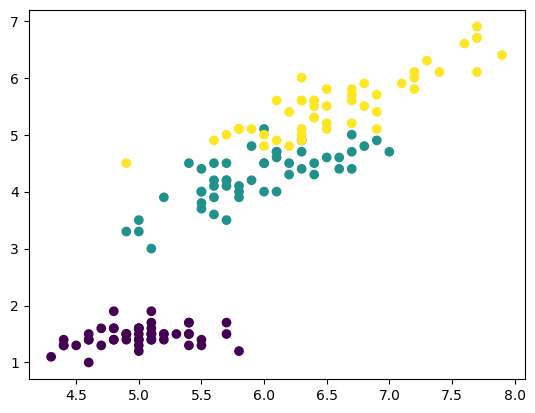

In [24]:
# 散布図にプロット
plt.scatter(df['sepal_w'], df['petal_l'], c=df['class'])

In [25]:
from sklearn.model_selection import train_test_split

# X,y にデータを入れる
X=df[["sepal_w","petal_l"]].values
y=df[["class"]]
y = np.ravel(y.astype(np.integer)) #一次元データに整形


#学習用データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y)
# 学習をおこなう
from sklearn import svm
clf=svm.LinearSVC(C=10,random_state=50)

#from sklearn import linear_model
#clf=linear_model.SGDClassifier()

#from sklearn import neighbors
#clf = neighbors.KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

#正答率を求める
print("正答率(学習) = ", clf.score(X_train,y_train))
print("正答率(テスト) = ", clf.score(X_test,y_test))

正答率(学習) =  0.9375
正答率(テスト) =  0.8947368421052632


/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

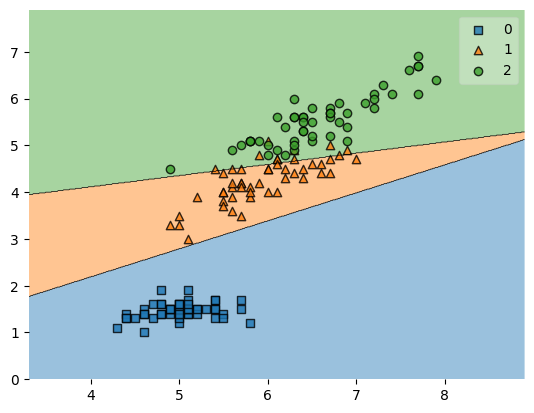

In [26]:
# 境界線を描き、データをプロットする
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf)